<a href="https://colab.research.google.com/github/alphaameer007/RHM_FYP/blob/main/TCN_WITH_EEMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!git clone https://github.com/alphaameer007/RHM_FYP

In [ ]:
!pip install keras-tcn --no-dependencies 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tcn import TCN
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df=pd.read_csv('/content/RHM_FYP/TurkeyWindFarm.csv')
#df=pd.read_csv('turkey.csv')
df

,time,LV ActivePower (kW),Wind Speed (m/s),wind energy,Wind Direction (°)
0,1/1/2018 0:00,380.047791,5.311336,416.328908,259.994904
1,1/1/2018 0:10,453.769196,5.672167,519.917511,268.641113
2,1/1/2018 0:20,306.376587,5.216037,390.900016,272.564789
3,1/1/2018 0:30,419.645904,5.659674,516.127569,271.258087
4,1/1/2018 0:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
52555,12/31/2018 23:10,2963.980957,11.404030,3397.190793,80.502724
52556,12/31/2018 23:20,1684.353027,7.332648,1173.055771,84.062599
52557,12/31/2018 23:30,2201.106934,8.435358,1788.284755,84.742500
52558,12/31/2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [ ]:
df.drop('time', inplace=True, axis=1)
cols = df.columns.tolist()
cols[0], cols[3] = cols[3], cols[0]
df = df[cols]
df


,Wind Direction (°),Wind Speed (m/s),wind energy,LV ActivePower (kW)
0,259.994904,5.311336,416.328908,380.047791
1,268.641113,5.672167,519.917511,453.769196
2,272.564789,5.216037,390.900016,306.376587
3,271.258087,5.659674,516.127569,419.645904
4,265.674286,5.577941,491.702972,380.650696
...,...,...,...,...
52555,80.502724,11.404030,3397.190793,2963.980957
52556,84.062599,7.332648,1173.055771,1684.353027
52557,84.742500,8.435358,1788.284755,2201.106934
52558,84.297913,9.421366,2418.382503,2515.694092


In [ ]:
df

,Wind Direction (°),Wind Speed (m/s),wind energy,LV ActivePower (kW)
0,259.994904,5.311336,416.328908,380.047791
1,268.641113,5.672167,519.917511,453.769196
2,272.564789,5.216037,390.900016,306.376587
3,271.258087,5.659674,516.127569,419.645904
4,265.674286,5.577941,491.702972,380.650696
...,...,...,...,...
52555,80.502724,11.404030,3397.190793,2963.980957
52556,84.062599,7.332648,1173.055771,1684.353027
52557,84.742500,8.435358,1788.284755,2201.106934
52558,84.297913,9.421366,2418.382503,2515.694092


In [ ]:
df=df['LV ActivePower (kW)']

In [ ]:
df

0         380.047791
1         453.769196
2         306.376587
3         419.645904
4         380.650696
            ...     
52555    2963.980957
52556    1684.353027
52557    2201.106934
52558    2515.694092
52559    2820.466064
Name: LV ActivePower (kW), Length: 52560, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range = (-1,1)) 
scaled_data = scaler.fit_transform(df.values.reshape(-1,1))
scaled_data.shape
#scaled_data = np.squeeze(scaled_data)
#scaled_data.shape

(52560, 1)

In [ ]:
scaled_data.shape

(52560, 1)

In [ ]:
df = scaled_data
df.shape
df

array([[-0.78873371],
       [-0.7480172 ],
       [-0.8294225 ],
       ...,
       [ 0.21704171],
       [ 0.39078896],
       [ 0.55911527]])

In [ ]:
df.shape

(52560, 1)

In [ ]:
# Calculate the number of readings per day
readings_per_day = 144

#n = number of day
n = 5

# Calculate the sequence length (n days in readings)
sequence_length = readings_per_day * n

# Set the lookback window to be the same as the sequence length
lookback_window = sequence_length

# Convert the data to a NumPy array
#df = df.values

x, y = [], []
for i in range(lookback_window, len(df)):
    x.append(df[i - lookback_window:i])
    y.append(df[i])
x = np.array(x)
y = np.array(y)

In [ ]:
print(x.shape)
print(y.shape)

(51840, 720, 1)
(51840, 1)


In [ ]:
print(y)

[[-0.58019696]
 [-0.62731503]
 [-0.67481901]
 ...
 [ 0.21704171]
 [ 0.39078896]
 [ 0.55911527]]


In [ ]:
df[720]

array([-0.58019696])

In [ ]:
# Calculate the number of test samples (last 3 days of the year)
num_test_samples = 720

# Split the data into training and test sets
x_train = x[:-num_test_samples]
y_train = y[:-num_test_samples]
x_test = x[-num_test_samples:]
y_test = y[-num_test_samples:]

In [ ]:
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)


x_train : (51120, 720, 1)
x_test : (720, 720, 1)
y_train : (51120, 1)
y_test : (720, 1)


In [ ]:
51840+720

52560

In [ ]:
df[431]

array([0.5493698 , 0.60997117, 1.        , 0.95625377])

In [ ]:
x_train[0]

array([[0.7222129 , 0.21071704, 0.11564692, 0.10502234],
       [0.74623031, 0.22503231, 0.14442153, 0.1253945 ],
       [0.75712948, 0.20693623, 0.10858334, 0.08466405],
       ...,
       [0.19712844, 0.14154479, 0.03086218, 0.02038635],
       [0.19702649, 0.13872388, 0.02403727, 0.0135909 ],
       [0.19692454, 0.13590298, 0.01721236, 0.00679545]])

In [ ]:
df[432]

array([0.54131557, 0.72062099, 1.        , 0.99583008])

In [ ]:
y_train[0]

0.009888632135421493

In [ ]:
model = keras.models.Sequential([
    TCN(input_shape=(lookback_window, 1), 
        kernel_size=10,
        nb_filters=32,
        dilations=[1, 2, 4, 8, 16],
        padding='causal',
        activation='relu',
        return_sequences=False,
        nb_stacks=2,
        use_skip_connections=False,
        use_batch_norm=False
        ),
    keras.layers.Dense(1)
])
model.summary()
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_mean_absolute_percentage_error",
    patience=15,
    start_from_epoch=15,
   restore_best_weights=True,
   mode="min"
)
model.compile('adam','mae',metrics=keras.metrics.MeanAbsolutePercentageError())
print('Train...')
history = model.fit(x_train, y_train,
                    epochs=50,
                    verbose=1,validation_data=(x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 32)                195584    
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 195,617
Trainable params: 195,617
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/50
1598/1598 [==============================] - 59s 26ms/step - loss: 0.3275 - mean_absolute_percentage_error: 163.9061 - val_loss: 0.0722 - val_mean_absolute_percentage_error: 20.6272
Epoch 2/50
1598/1598 [==============================] - 40s 25ms/step - loss: 0.0964 - mean_absolute_percentage_error: 77.3294 - val_loss: 0.0370 - val_mean_absolute_percentage_error: 20.1580
Epoch 3/50
1598/1598 [==============================

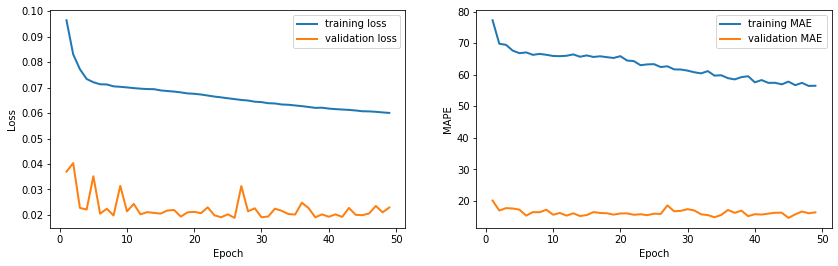

In [ ]:
import matplotlib.pyplot as plt
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"mean_absolute_percentage_error"], lw=2, label='training MAE')
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")
plt.legend(loc='upper right')
plt.show()

23/23 [==============================] - 1s 11ms/step
(720, 720, 1)
(720, 1)
(720, 1)


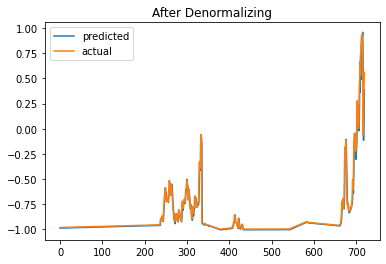

In [ ]:
p = model.predict(x_test)
print(x_test.shape)
print(y_test.shape)
print(p.shape)
y_test = y_test #denormalizing
predictions = p
plt.plot(predictions) 
plt.plot(y_test) 
plt.title('After Denormalizing')
plt.legend(['predicted', 'actual'])
plt.show()

In [ ]:
predictions = pd.DataFrame(predictions)
actual_data = pd.DataFrame(y_test)
result = pd.concat([actual_data,predictions],axis=1)
result.columns = ['actual_data','predicted_data']

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape
  

error = mape(result['actual_data'],result['predicted_data'])
  

print("Mean absolute percentage error : " + str(error))

Mean absolute percentage error : 0.16408474706481374


In [ ]:
!pip install EMD-signal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 KB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 KB 439.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.1 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0


In [ ]:
from PyEMD import EEMD 
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas as pd

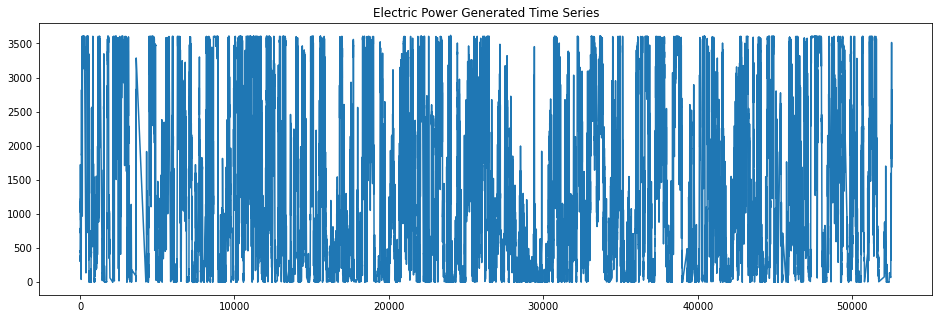

In [ ]:
#df=pd.read_csv('turkey.csv')
df=pd.read_csv('/content/RHM_FYP/TurkeyWindFarm.csv')
df=df['LV ActivePower (kW)']
data = df.to_numpy()
plt.figure(figsize=(16,5))
plt.plot(data)
plt.title("Electric Power Generated Time Series")
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range = (-1,1)) 
scaled_data = scaler.fit_transform(data.reshape(-1,1))
scaled_data.shape
scaled_data = np.squeeze(scaled_data)
scaled_data.shape

(52560,)

In [ ]:
in_sample = scaled_data
print(in_sample.shape)

(52560,)


In [ ]:
in_sample = in_sample.reshape(-1,1)
in_sample.shape

(52560, 1)

In [ ]:
in_sample

array([-0.78873371, -0.7480172 , -0.8294225 , ...,  0.21704171,
        0.39078896,  0.55911527])

In [ ]:
eemd = EEMD()
eemd.extrema_detection = "simple"
t = np.linspace(0, in_sample.shape[0], in_sample.shape[0])
t = t.reshape(-1,1)
print(t.shape, in_sample.shape)
t = np.squeeze(t)
in_sample = np.squeeze(in_sample)

(52560, 1) (52560, 1)


In [ ]:


imfs = eemd(in_sample, t)
imfs1,residual = eemd.get_imfs_and_residue()

print(imfs1.shape)

(18, 52560)


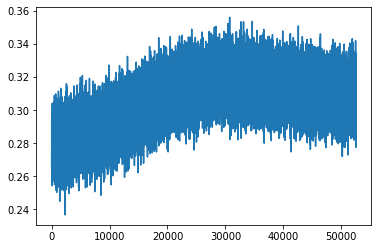

In [ ]:
plt.plot(residual)

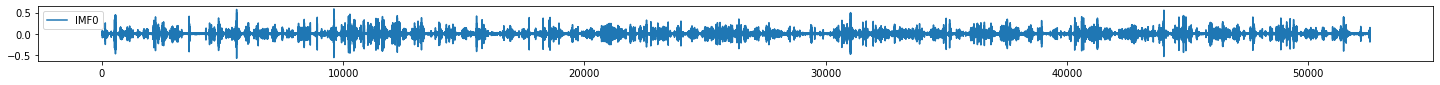

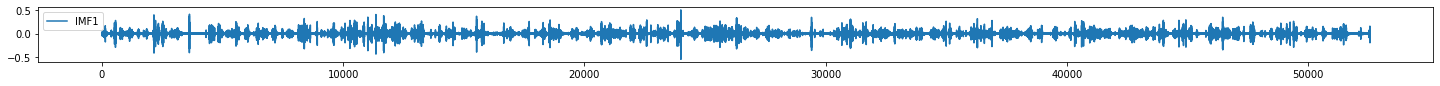

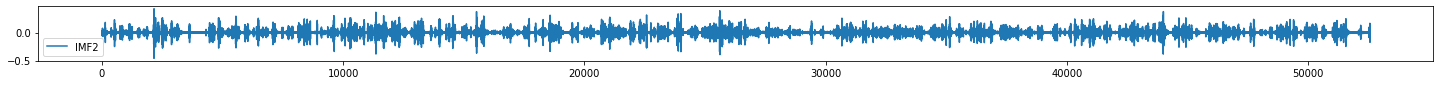

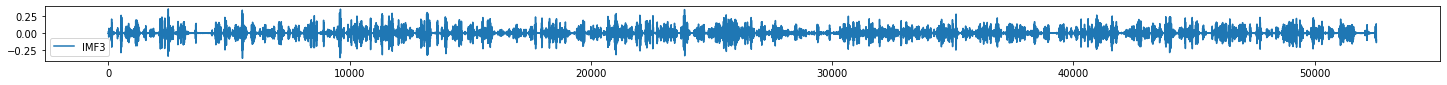

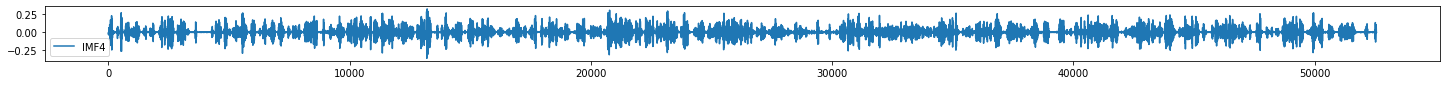

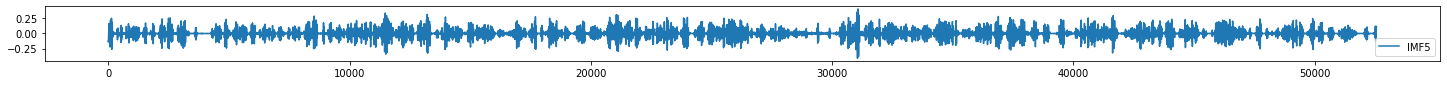

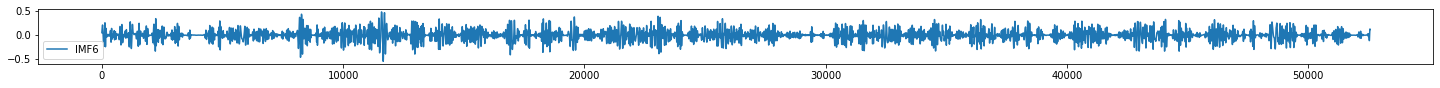

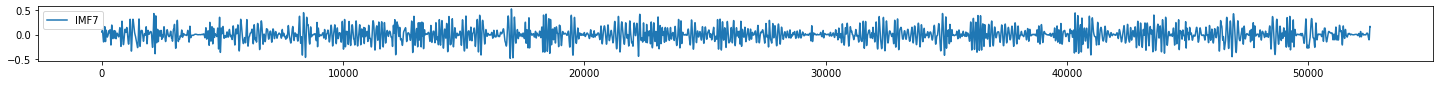

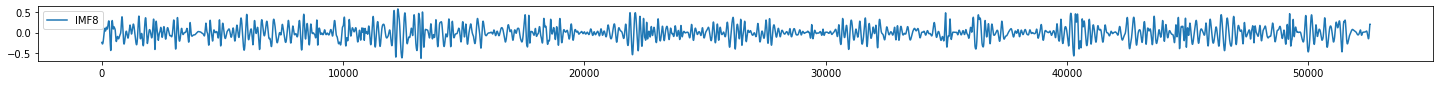

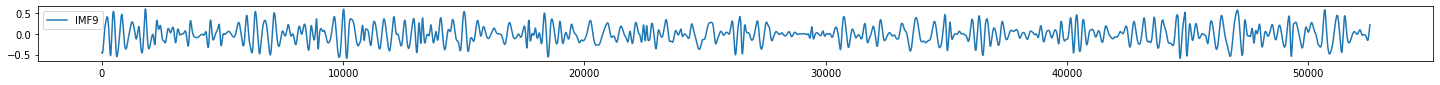

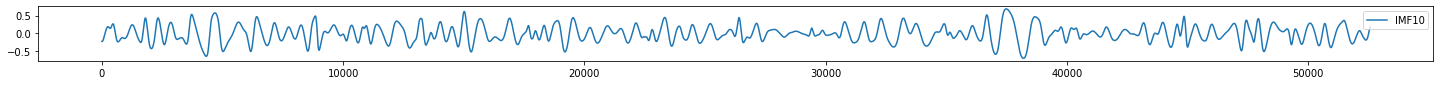

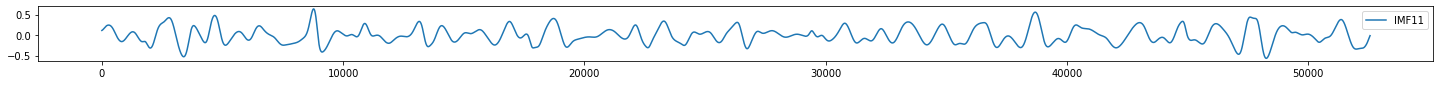

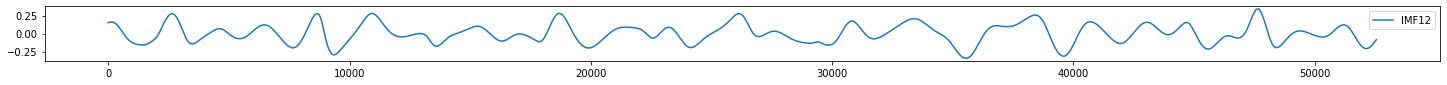

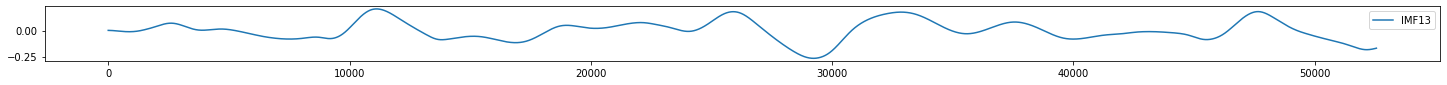

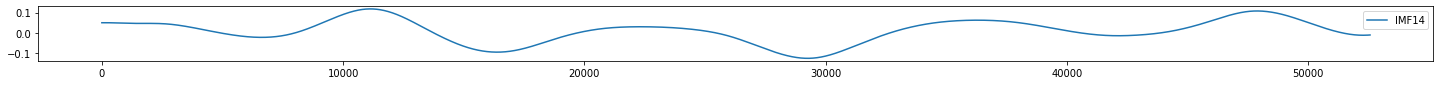

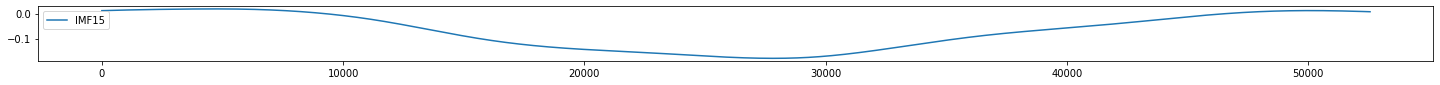

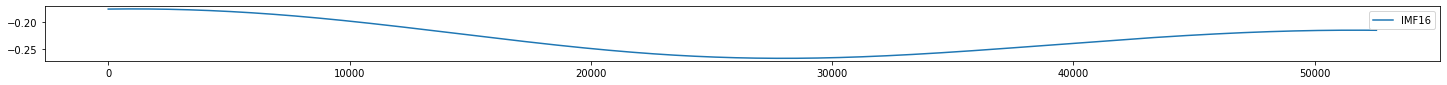

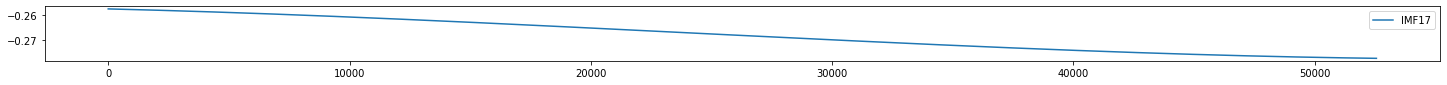

In [ ]:
for i in range(len(imfs1)):
  fig, ax = plt.subplots(figsize=(25,1))
  fig = plt.plot(imfs1[i], label = "IMF{}".format(i))
  plt.legend()
  plt.show()

(0.0, 1000.0)

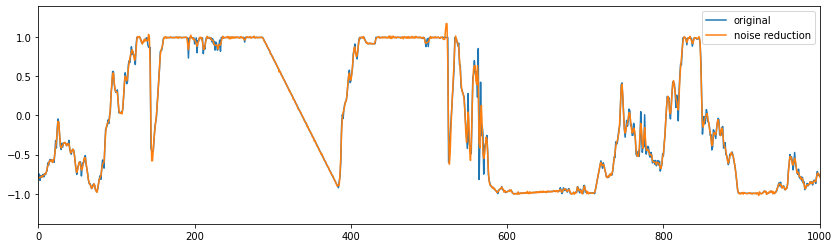

In [ ]:
plt.figure(figsize=(14, 4))
data_eemd = in_sample  - imfs1[0] 
plt.plot(in_sample,label='original')
plt.plot(data_eemd,label='noise reduction')
plt.legend()
plt.xlim(0, 1000)

In [ ]:
import plotly.express as px

In [ ]:
fig=px.line(y=in_sample)
fig.add_scatter(y=data_eemd)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
data_eemd.shape

(52560,)

In [ ]:
# Calculate the number of readings per day
readings_per_day = 144

#n = number of day
n = 5

# Calculate the sequence length (n days in readings)
sequence_length = readings_per_day * n

# Set the lookback window to be the same as the sequence length
lookback_window = sequence_length

# Convert the data to a NumPy array
#df = df.values

x, y = [], []
for i in range(lookback_window, len(data_eemd)):
    x.append(data_eemd[i - lookback_window:i])
    y.append(data_eemd[i])
x = np.array(x)
y = np.array(y)

In [ ]:
# Calculate the number of test samples (last 3 days of the year)
num_test_samples = 720

# Split the data into training and test sets
x_train = x[:-num_test_samples]
y_train = y[:-num_test_samples]
x_test = x[-num_test_samples:]
y_test = y[-num_test_samples:]

In [ ]:
model = keras.models.Sequential([
    TCN(input_shape=(lookback_window, 1), 
        kernel_size=10,
        nb_filters=32,
        dilations=[1, 2, 4, 8, 16],
        padding='causal',
        activation='relu',
        return_sequences=False,
        nb_stacks=2,
        use_skip_connections=False,
        use_batch_norm=False
        ),
    keras.layers.Dense(1)
])
model.summary()
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_mean_absolute_percentage_error",
   patience=15,
    start_from_epoch=15,
    restore_best_weights=True,
    mode="min"
)
model.compile('adam','mae',metrics=keras.metrics.MeanAbsolutePercentageError())
print('Train...')
history = model.fit(x_train, y_train,
                    epochs=50,
                    verbose=1,validation_data=(x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 32)                195584    
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 195,617
Trainable params: 195,617
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/50
1598/1598 [==============================] - 58s 25ms/step - loss: 0.3190 - mean_absolute_percentage_error: 232.0216 - val_loss: 0.0767 - val_mean_absolute_percentage_error: 10.6721
Epoch 2/50
1598/1598 [==============================] - 41s 26ms/step - loss: 0.0661 - mean_absolute_percentage_error: 50.7223 - val_loss: 0.0259 - val_mean_absolute_percentage_error: 5.0040
Epoch 3/50
1598/1598 [==============================]

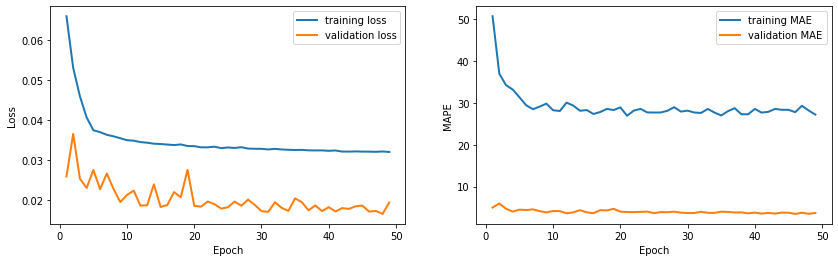

In [ ]:
import matplotlib.pyplot as plt
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"mean_absolute_percentage_error"], lw=2, label='training MAE')
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")
plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'MAPE')

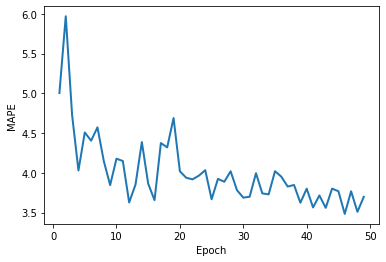

In [ ]:
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")

23/23 [==============================] - 1s 12ms/step
(720, 720)
(720,)
(720, 1)


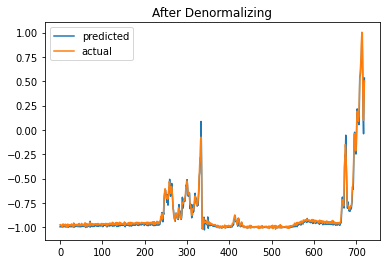

In [ ]:
p = model.predict(x_test)
print(x_test.shape)
print(y_test.shape)
print(p.shape)
y_test = y_test #denormalizing
predictions = p
plt.plot(predictions) 
plt.plot(y_test) 
plt.title('After Denormalizing')
plt.legend(['predicted', 'actual'])
plt.show()

In [ ]:
predictions = pd.DataFrame(predictions)
actual_data = pd.DataFrame(y_test)
result = pd.concat([actual_data,predictions],axis=1)
result.columns = ['actual_data','predicted_data']
from sklearn.metrics import mean_absolute_percentage_error as mape
  

error = mape(result['actual_data'],result['predicted_data'])
  

print("Mean absolute percentage error : " + str(error))

In [ ]:
# Calculate the number of readings per day
readings_per_day = 144

#n = number of day
n = 5

# Calculate the sequence length (n days in readings)
sequence_length = readings_per_day * n

# Set the lookback window to be the same as the sequence length
lookback_window = sequence_length

# Convert the data to a NumPy array
#df = df.values

x, y = [], []
for i in range(lookback_window, len(data_eemd)):
    x.append(data_eemd[i - lookback_window:i])
    y.append(in_sample[i])
x = np.array(x)
y = np.array(y)

In [ ]:
# Calculate the number of test samples (last 3 days of the year)
num_test_samples = 720

# Split the data into training and test sets
x_train = x[:-num_test_samples]
y_train = y[:-num_test_samples]
x_test = x[-num_test_samples:]
y_test = y[-num_test_samples:]

In [ ]:
model = keras.models.Sequential([
    TCN(input_shape=(lookback_window, 1), 
        kernel_size=10,
        nb_filters=32,
        dilations=[1, 2, 4, 8, 16],
        padding='causal',
        activation='relu',
        return_sequences=False,
        nb_stacks=2,
        use_skip_connections=False,
        use_batch_norm=False
        ),
    keras.layers.Dense(1)
])
model.summary()
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_mean_absolute_percentage_error",
   patience=15,
    start_from_epoch=15,
    restore_best_weights=True,
    mode="min"
)
model.compile('adam','mae',metrics=keras.metrics.MeanAbsolutePercentageError())
print('Train...')
history = model.fit(x_train, y_train,
                    epochs=50,
                    verbose=1,validation_data=(x_test,y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_2 (TCN)                 (None, 32)                195584    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 195,617
Trainable params: 195,617
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/50
1598/1598 [==============================] - 48s 26ms/step - loss: 0.4033 - mean_absolute_percentage_error: 202.4677 - val_loss: 0.0384 - val_mean_absolute_percentage_error: 9.9110
Epoch 2/50
1598/1598 [==============================] - 44s 27ms/step - loss: 0.0856 - mean_absolute_percentage_error: 57.0729 - val_loss: 0.0937 - val_mean_absolute_percentage_error: 18.4486
Epoch 3/50
1598/1598 [=============================

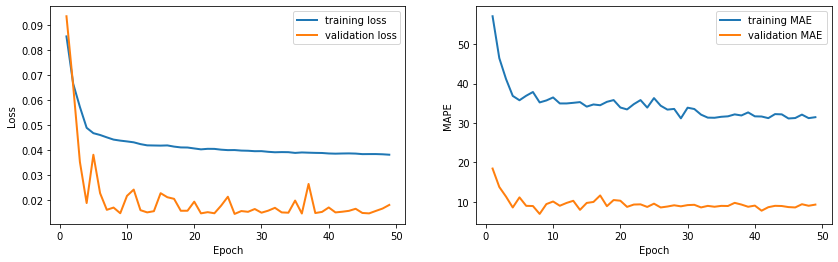

In [ ]:
import matplotlib.pyplot as plt
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"mean_absolute_percentage_error"], lw=2, label='training MAE')
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")
plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'MAPE')

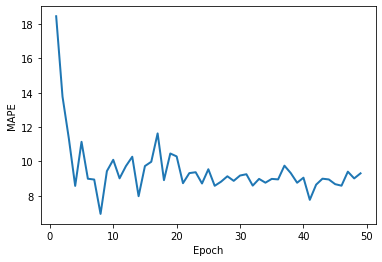

In [ ]:
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")

23/23 [==============================] - 1s 12ms/step
(720, 720)
(720,)
(720, 1)


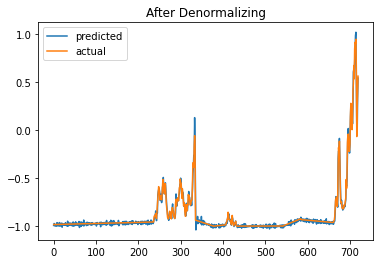

In [ ]:
p = model.predict(x_test)
print(x_test.shape)
print(y_test.shape)
print(p.shape)
y_test = y_test #denormalizing
predictions = p
plt.plot(predictions) 
plt.plot(y_test) 
plt.title('After Denormalizing')
plt.legend(['predicted', 'actual'])
plt.show()

In [ ]:
predictions = pd.DataFrame(predictions)
actual_data = pd.DataFrame(y_test)
result = pd.concat([actual_data,predictions],axis=1)
result.columns = ['actual_data','predicted_data']
from sklearn.metrics import mean_absolute_percentage_error as mape
  

error = mape(result['actual_data'],result['predicted_data'])
  

print("Mean absolute percentage error : " + str(error))

Mean absolute percentage error : 0.09305549294365678
